In [2]:
import pandas as pd
import numpy as np
supply_chain_data = pd.read_csv('/Users/huangwen/上课资料/智慧物流-订单规划/lesson1/SupplyChain/SupplyChain.csv', encoding='unicode-escape')

In [3]:
supply_chain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
#处理名字，在处理欺诈问题中，是否相同名字作为一个重要字段
supply_chain_data['Customer Full Name'] = supply_chain_data['Customer Fname'] + supply_chain_data['Customer Lname']

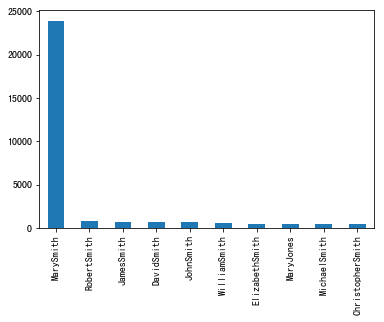

In [9]:
import matplotlib.pylab as plt
supply_chain_data['Customer Full Name'].value_counts().nlargest(10).plot.bar()

In [11]:
#查看交易类型
supply_chain_data['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [103]:
#显示不同区域的支付类型的情况
count_dict ={}
names = supply_chain_data[supply_chain_data['Type'] == 'DEBIT']['Order Region'].value_counts().index
for i in supply_chain_data['Type'].unique():
    #如果按照DETIT排序，应该先固定所有区域，才能使结果展示正确
    count_dict[i] = supply_chain_data[supply_chain_data['Type'] == i]['Order Region'].value_counts()[names]

In [101]:
supply_chain_data[supply_chain_data['Type'] == 'DEBIT']['Order Region'].value_counts()[names]

Central America    10804
Western Europe     10362
South America       5536
Oceania             3985
Northern Europe     3807
Southern Europe     3656
Southeast Asia      3567
West of USA         3187
Caribbean           3101
South Asia          3009
East of USA         2776
Eastern Asia        2634
US Center           2317
West Asia           2306
Eastern Europe      1577
South of  USA       1525
West Africa         1502
North Africa        1235
East Africa          737
Central Africa       659
Southern Africa      485
Canada               311
Central Asia         217
Name: Order Region, dtype: int64

In [102]:
supply_chain_data[supply_chain_data['Type'] == 'TRANSFER']['Order Region'].value_counts()[names]

Central America    8047
Western Europe     7457
South America      4236
Oceania            2644
Northern Europe    2645
Southern Europe    2540
Southeast Asia     2622
West of USA        2249
Caribbean          2424
South Asia         2097
East of USA        1818
Eastern Asia       2058
US Center          1581
West Asia          1636
Eastern Europe     1043
South of  USA      1142
West Africa         993
North Africa        950
East Africa         488
Central Africa      472
Southern Africa     293
Canada              313
Central Asia        135
Name: Order Region, dtype: int64

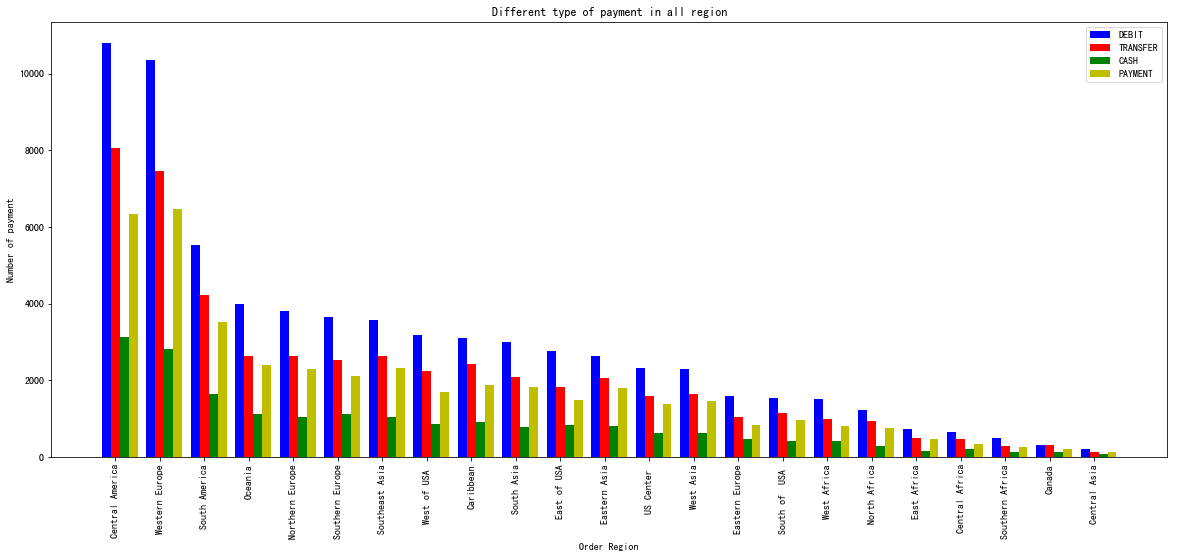

In [104]:
fig, ax = plt.subplots(figsize=(20,8))
index = np.arange(supply_chain_data['Order Region'].nunique())
#每种类型的现实间隔
type_color_dict = {'DEBIT':'b', 'TRANSFER':'r', 'PAYMENT':'y', 'CASH':'g'} 
bar_width = 0.2
for key,i in zip(count_dict.keys(), np.arange(supply_chain_data['Type'].nunique())):
    type1 = plt.bar(index+i*bar_width, list(count_dict[key]), bar_width, color=type_color_dict[key], label=key)
plt.xlabel('Order Region')
plt.ylabel('Number of payment')
plt.title('Different type of payment in all region')
plt.legend()
plt.xticks(index + bar_width, names, rotation='vertical')
plt.show()

In [111]:
#对负收益的产品进行探索
loss = supply_chain_data[supply_chain_data['Benefit per order'] <0]
loss['Benefit per order'].sum()

-3883547.345768667

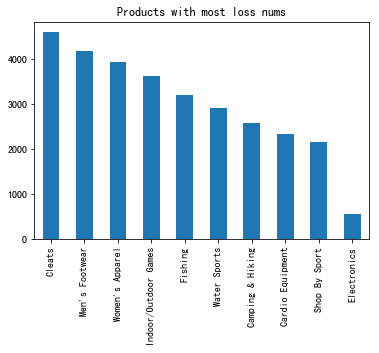

In [117]:
#负收益产品中Category Name的个数top10
loss['Category Name'].value_counts().nlargest(10).plot.bar(title='Products with most loss nums')

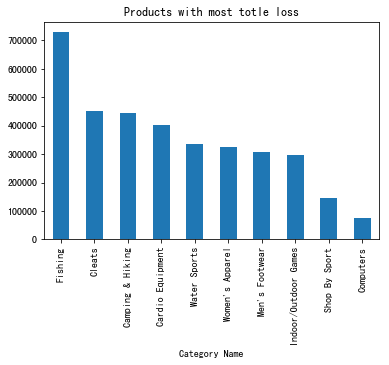

In [118]:
#负收益产品中Category Name的负收益总和top10
loss.groupby(['Category Name'])['Benefit per order'].sum().abs().nlargest(10).plot.bar(title='Products with most totle loss')

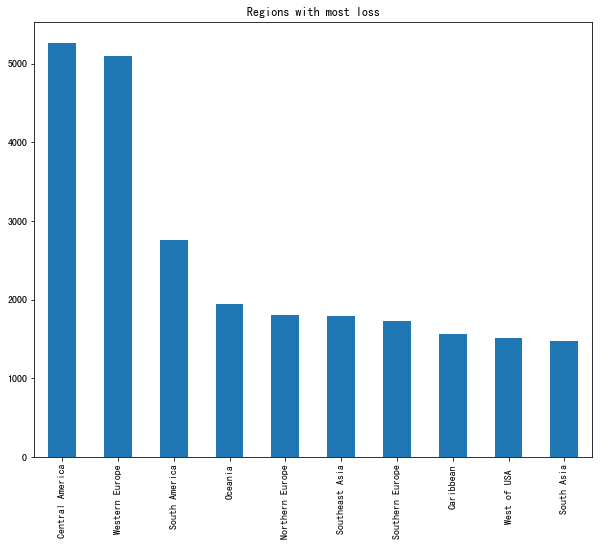

In [123]:
#负收益地区top10
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(10,8),title='Regions with most loss')

In [126]:
#负收益，有可能是欺诈交易， 会采用哪种方式
supply_chain_data['Order Status'].value_counts()
suspected_fraud = supply_chain_data[supply_chain_data['Order Status'] == 'SUSPECTED_FRAUD']
suspected_fraud['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

In [139]:
print('总的负收益：' + str(loss['Benefit per order'].sum()))
print('欺诈订单的收益：' + str(suspected_fraud['Benefit per order'].sum()))
print('欺诈订单的负收益：' + str(suspected_fraud[suspected_fraud['Benefit per order']<0]['Benefit per order'].sum()))
print('欺诈订单中支付方式：' + str(suspected_fraud['Type'].value_counts().index))

总的负收益：-3883547.345768667
欺诈订单的收益：85136.71003636598
欺诈订单的负收益：-90182.98003954
欺诈订单中支付方式：Index(['TRANSFER'], dtype='object')


Text(0.5,0,'Region')

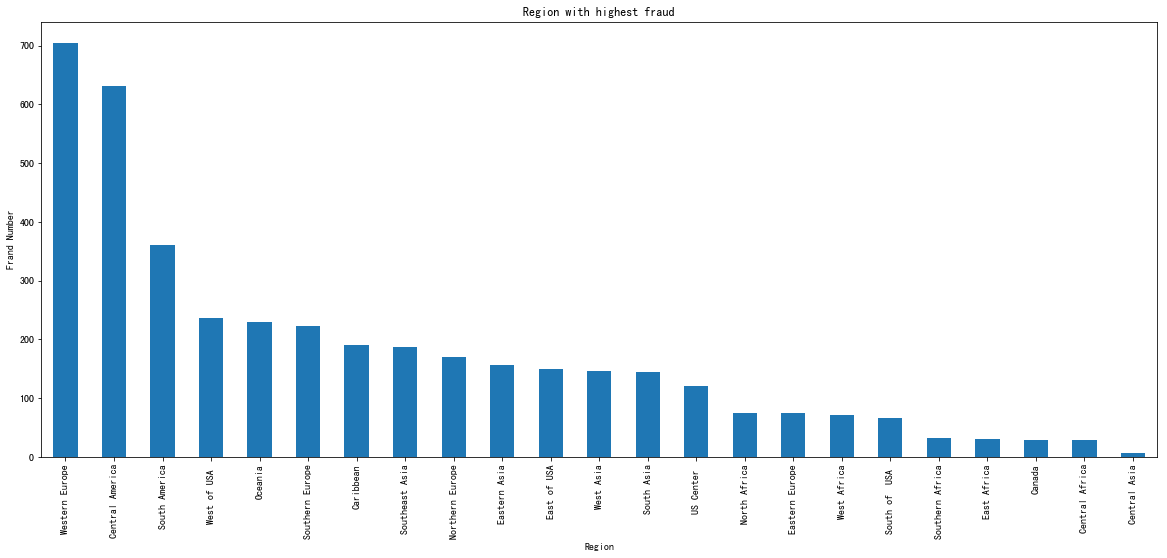

In [142]:
#显示不同区域的欺诈交易行为
suspected_fraud['Order Region'].value_counts().plot.bar(figsize=(20,8),title='Region with highest fraud')
plt.ylabel('Frand Number')
plt.xlabel('Region')

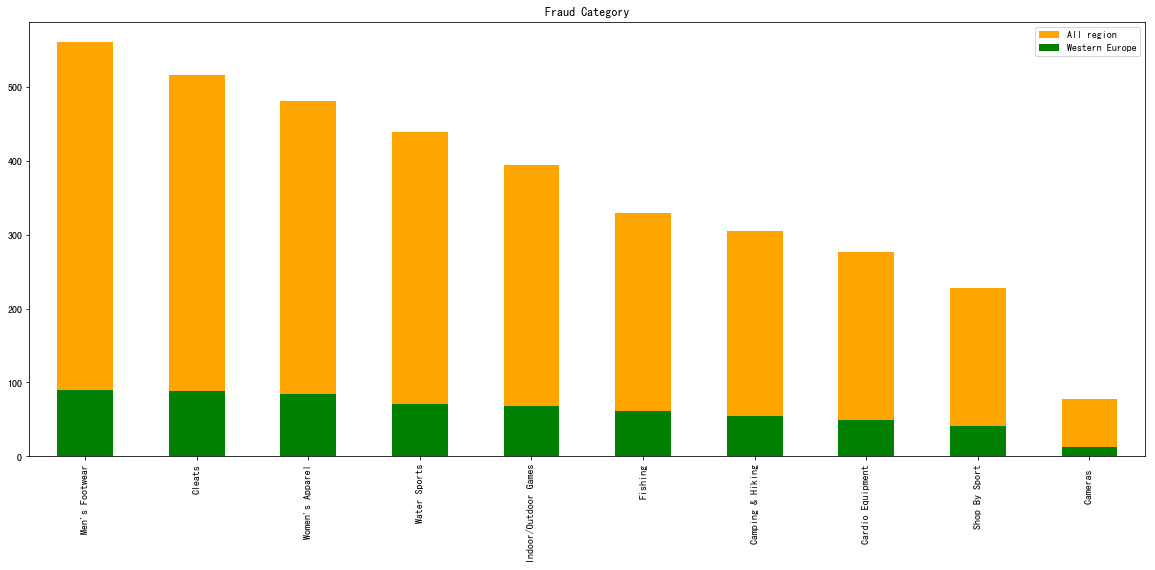

In [160]:
#分析说明：Western Europe地区欺诈交易最多
#堆积条形图
high_fraud_we = suspected_fraud[suspected_fraud['Order Region'] == 'Western Europe']
#找出风险最高的10个Category
fraud1 = suspected_fraud['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title='Fraud Category',color='orange')
fraud2 = high_fraud_we['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Fraud Category',color='green')
plt.legend(['All region','Western Europe'])

Cleats                  560
Men's Footwear          516
Women's Apparel         481
Indoor/Outdoor Games    439
Fishing                 394
Water Sports            329
Camping & Hiking        305
Cardio Equipment        276
Shop By Sport           228
Electronics              77
Name: Category Name, dtype: int64
Men's Footwear          90
Cleats                  88
Women's Apparel         84
Water Sports            71
Indoor/Outdoor Games    68
Fishing                 62
Camping & Hiking        54
Cardio Equipment        49
Shop By Sport           41
Cameras                 13
Name: Category Name, dtype: int64


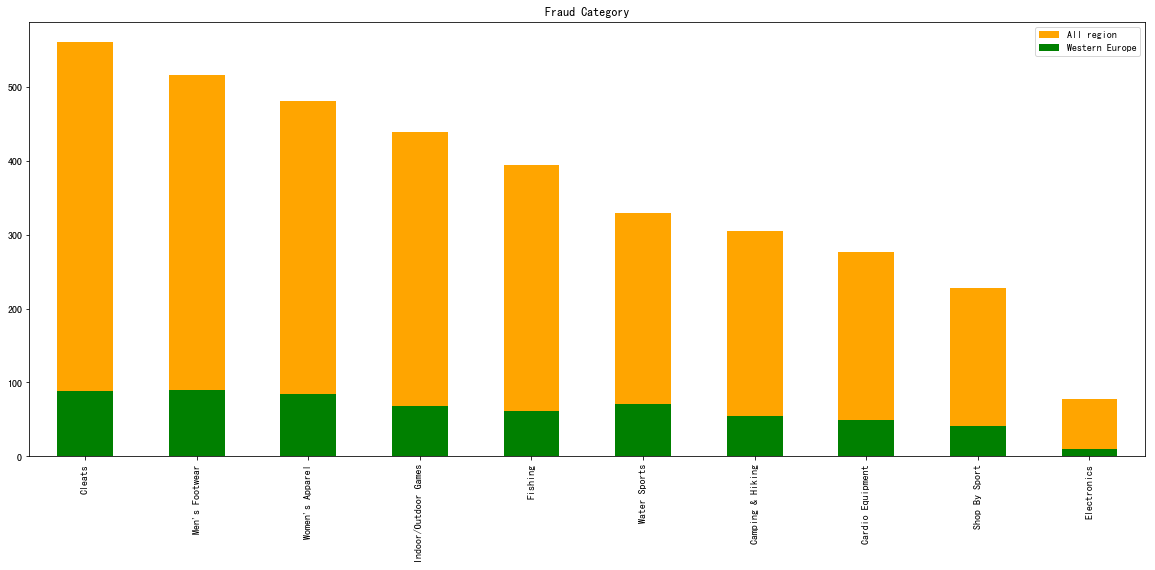

In [161]:
print(suspected_fraud['Category Name'].value_counts().nlargest(10))
print(high_fraud_we['Category Name'].value_counts().nlargest(10))

#从这里看出来，和上面一样老师的代码这块会有问题，因为两个value_counts出来的index排序是不同的，所以要固定一个，另一个要重新index之后才能使用
names = suspected_fraud['Category Name'].value_counts().nlargest(10).index
fraud1 = suspected_fraud['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title='Fraud Category',color='orange')
fraud2 = high_fraud_we['Category Name'].value_counts()[names].plot.bar(figsize=(20,8),title='Fraud Category',color='green')
plt.legend(['All region','Western Europe'])

In [158]:
high_fraud_we['Category Name'].value_counts()[names]

Cleats                  88
Men's Footwear          90
Women's Apparel         84
Indoor/Outdoor Games    68
Fishing                 62
Water Sports            71
Camping & Hiking        54
Cardio Equipment        49
Shop By Sport           41
Electronics             10
Name: Category Name, dtype: int64

MarySmith        528
RobertSmith       28
JamesSmith        23
DavidSmith        20
JonathanSmith     18
HenrySmith        16
DanielSmith       15
MaryTorres        15
MaryJones         14
SusanSmith        13
Name: Customer Full Name, dtype: int64

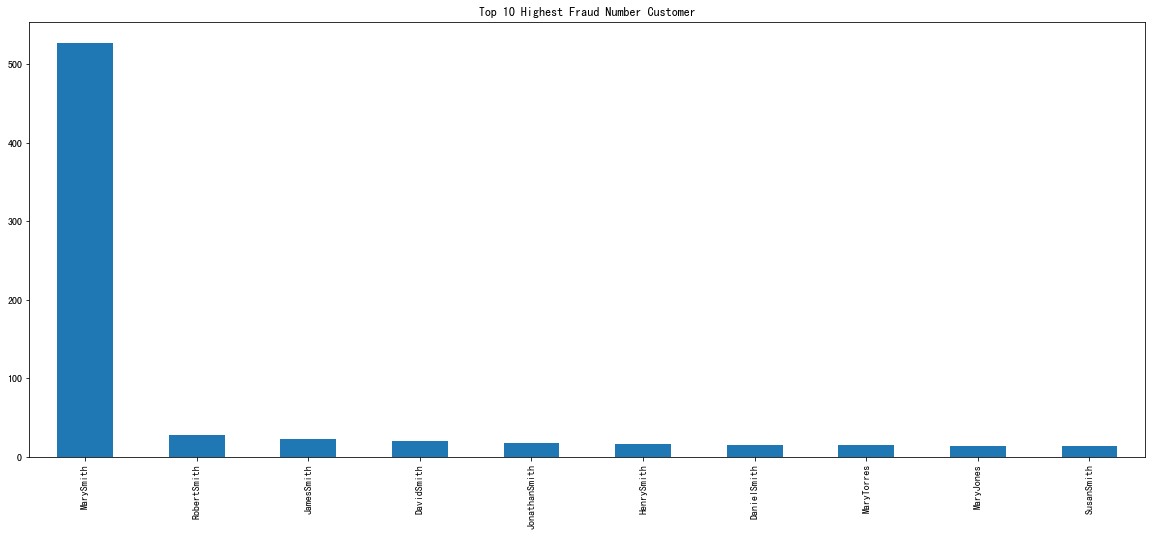

In [185]:
#筛选top10 风险最高的Customer,总金额和总数量
customer = suspected_fraud['Customer Full Name'].value_counts().nlargest(10)
customer.plot.bar(figsize=(20,8), title='Top 10 Highest Fraud Customer')
customer

Customer Full Name
MarySmith        102491.661910
RobertSmith        5879.350136
JamesSmith         5408.440102
DavidSmith         3787.540104
MaryJones          3599.490051
MaryTorres         3479.680088
JonathanSmith      3323.720093
SusanSmith         2769.800079
MaryThompson       2729.730064
AshleySmith        2719.790058
Name: Sales, dtype: float64

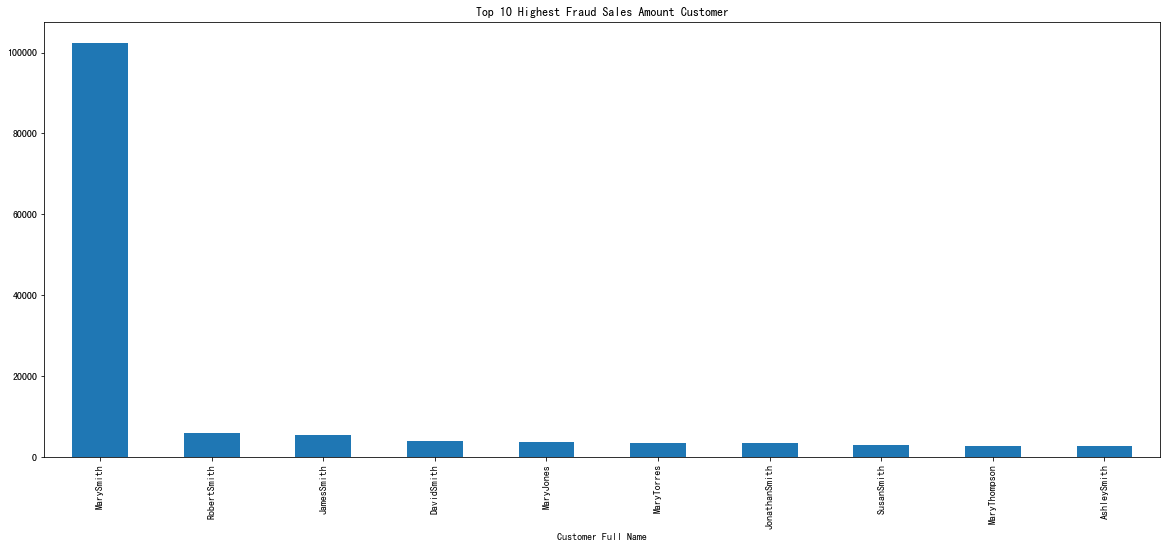

In [188]:
#筛选top10 风险最高的Customer 总金额
customer = suspected_fraud.groupby(['Customer Full Name'])['Sales'].sum().sort_values(ascending=False).nlargest(10)
customer.plot.bar(figsize=(20,8), title='Top 10 Highest Fraud Sales Amount Customer')
customer